# WaveNet-vocoder

In [1]:
# snippet from autovc vocoder.ipynb

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import torch
import librosa
import pickle
from synthesis import build_model
from synthesis import wavegen
import numpy as np
import soundfile as sf

# spect_vc = pickle.load(open('results1.pkl', 'rb'))
spmel_ex = ['/import/c4dm-02/bdoc3/spmel/damp_qianParams/val/32422426/32422426_1897222013.npy',
            '/import/c4dm-02/bdoc3/spmel/damp_qianParams/val/35796633/35796633_2224507466.npy',
            '/import/c4dm-02/bdoc3/spmel/damp_qianParams/val/41845084/41845084_1862237809.npy'
           ]

spect_vc = [(os.path.basename(spmel_ex[i]), np.load(spmel_ex[i])) for i in range(len(spmel_ex))]
device = torch.device("cuda")
model = build_model().to(device)
checkpoint = torch.load("/homes/bdoc3/my_data/autovc_models/checkpoint_step001000000_ema.pth")
model.load_state_dict(checkpoint["state_dict"])
dst_dir = os.path.join(os.getcwd(), 'wavs_from_wavenet')
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

for spect in spect_vc:
    name = spect[0]
    c = spect[1][1000:1128]
    print(name)
    waveform = wavegen(model, c=c, which_cuda=0)
    sf.write(os.path.join(dst_dir, name[:-4] +'_wvnt.wav'), waveform, samplerate=16000)

  0%|                                                                                                                                                                                       | 10/32768 [00:00<05:51, 93.08it/s]

32422426_1897222013.npy


  0%|                                                                                                                                                                                      | 11/32768 [00:00<05:04, 107.51it/s]

35796633_2224507466.npy


  0%|                                                                                                                                                                                      | 11/32768 [00:00<05:22, 101.47it/s]

41845084_1862237809.npy


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [05:50<00:00, 93.49it/s]


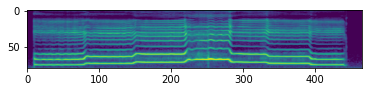

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.flipud(c.T))

In [4]:
import IPython.display as ipd
import os

In [5]:
ipd.Audio(waveform, rate=16000)